In [8]:
import numpy as np
import cv2
import tensorflow as tf

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
data0 = tf.keras.datasets.mnist

In [11]:
type(data0)

module

In [12]:
data0

<module 'tensorflow._api.v1.keras.datasets.mnist' from 'C:\\Users\\wsutt\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\mnist\\__init__.py'>

In [13]:
mnist_data = data0.load_data()

In [14]:
type(mnist_data)

tuple

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


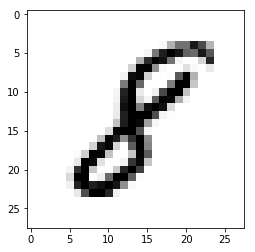

In [16]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [17]:
x_train[image_index].shape

(28, 28)

In [18]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 44s 727us/sample - loss: 0.2030 - acc: 0.9392
Epoch 2/10
60000/60000 [==============================] - 45s 743us/sample - loss: 0.0816 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 46s 771us/sample - loss: 0.0574 - acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 49s 818us/sample - loss: 0.0452 - acc: 0.9854
Epoch 5/10
60000/60000 [==============================] - 47s 779us/sample - loss: 0.0342 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 47s 785us/sample - loss: 0.0293 - acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 46s 774us/sample - loss: 0.0251 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 46s 767us/sample - loss: 0.0222 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 45s 750us/sample - loss: 0.0193 - acc: 0.9931
Epoch 10/10
60000/60000 [==============================] - 47s 7

In [21]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 190us/sample - loss: 0.0606 - acc: 0.9850


[0.060562680898552934, 0.985]

In [23]:
x_test[image_index].shape

(28, 28, 1)

9


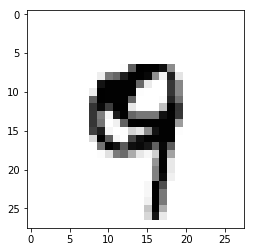

In [24]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
img = x_test[image_index]
pred = model.predict(img.reshape(1, img.shape[0], img.shape[1], 1))
print(pred.argmax())

In [25]:
pred

array([[1.6275794e-17, 2.1798264e-19, 7.8140137e-13, 2.9957806e-10,
        4.3131632e-08, 4.9155519e-10, 2.9832870e-14, 3.1030940e-13,
        9.0594030e-09, 1.0000000e+00]], dtype=float32)

##### Make it regress

In [ ]:
# ideas:
# find max left-top pixel max(mask[:,1,:]), max(mask[:,2,:])
# find the "inside point" of an eight in a NN:
#   1st: do this from first principles using standard cv

In [39]:
n=1000
x_train2 = copy.copy(x_train)
x_train2 = x_train[:n]
len(x_train2)

1000

In [53]:
y_train2 = np.array(
            [np.random.randint(0, 28, dtype='uint8') for _ in range(n)]
            )
print(len(y_train2))
y_train2[:10]

1000


array([27, 18, 12,  6,  2,  7, 14, 21,  0,  2], dtype=uint8)

In [66]:
y_train3 = np.array(
            [np.random.uniform(0.0, 28.0) for _ in range(n)]
            )
print(len(y_train3))
print(y_train3.dtype)
y_train3[:10]

1000
float64


array([2.18897199e+01, 3.26234698e+00, 6.32227699e+00, 2.28167350e+01,
       2.33846870e+01, 1.10056151e+01, 1.58625542e+01, 1.82982527e+01,
       1.15147308e+01, 9.14499402e-03])

In [54]:
print(type(y_train), type(y_train2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [55]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [56]:
y_train.dtype, y_train2.dtype

(dtype('uint8'), dtype('uint8'))

In [74]:
model2 = Sequential()

In [75]:
model2.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation=tf.nn.softmax))
# model2.add(Dense(10,activation=tf.nn.relu))
model2.add(Dense(1))

In [ ]:
#old
# model2.compile(optimizer='adam', 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# model2.fit(x=x_train,y=y_train, epochs=10)

In [76]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model2.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])

In [77]:
model2.fit(x=x_train2,y=y_train3, epochs=1)

1000/1000 [==============================] - 1s 880us/sample - loss: 236.3108 - mean_absolute_error: 13.1209 - mean_squared_error: 236.3108


In [82]:
# looks like it predicts in 0.0-1.0, 
# need to normalize/re-normalize y_train3

In [81]:
image_index = 20
# plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
img = x_test[image_index]
pred2 = model2.predict(img.reshape(1, img.shape[0], img.shape[1], 1))
pred2
# print(pred.argmax())

array([[0.77053505]], dtype=float32)

In [80]:
type(pred2)

numpy.ndarray

In [79]:
print(pred.argmax())

2


In [71]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [84]:
ret = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
ret

32768/30286 [================================] - 0s 3us/step


'C:\\Users\\wsutt\\.keras\\datasets\\auto-mpg.data'

In [29]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [34]:
len(x_train)

60000

In [36]:
import copy

1000

In [33]:
tf.losses.get_losses()

[]

In [26]:
import random

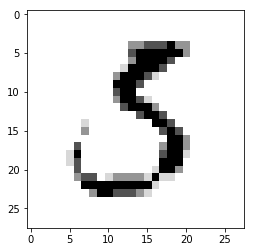

5


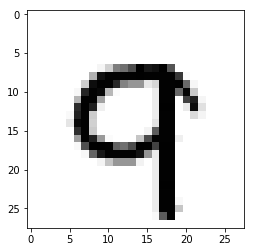

9


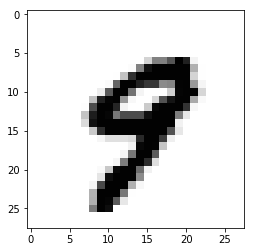

9


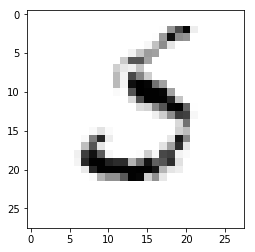

5


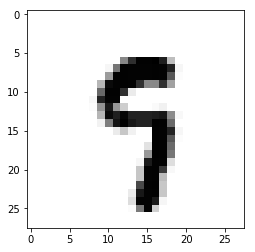

9


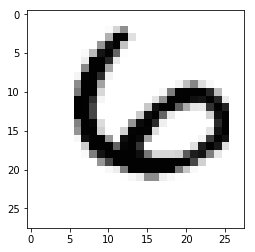

6


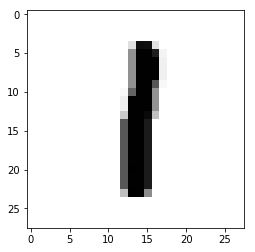

1


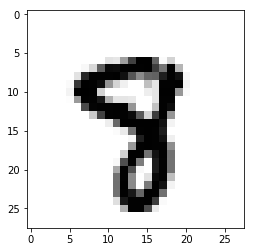

8


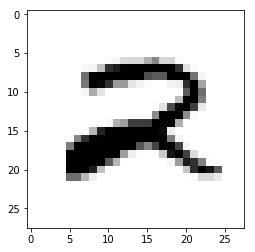

2


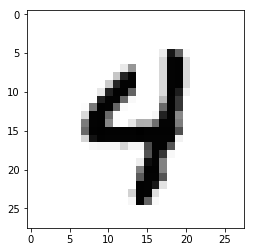

4


In [27]:
N = 10
for image_index in random.sample( list(range(len(x_test))), N):
    plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    plt.show()
    img = x_test[image_index]
    pred = model.predict(img.reshape(1, img.shape[0], img.shape[1], 1))
    print(pred.argmax())